In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 
import librosa
import librosa.display

In [14]:
debussy_file = 'audio/debussy.wav'
redhot_file = 'audio/redhot.wav'
duke_file = 'audio/duke.wav'

debussy, sr = librosa.load(debussy_file)
redhot, _  = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [15]:
FRAME_SIZE = 2048
HOP_SIZE = 512

debussy_spec = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
redhot_spec = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
duke_spec = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [16]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sampling_rate):
    frequency_range = sampling_rate/2
    freq_per_bin = frequency_range/spectrogram.shape[0]
    split_freq_bin = np.floor(split_frequency/freq_per_bin)
    return int(split_freq_bin)

In [17]:
def calc_ber(spectrogram, split_frequency, sampling_rate):
    split_freq_bin = calculate_split_frequency_bin(spectrogram, split_frequency, sampling_rate)
    
    power_spec = np.abs(spectrogram)**2
    power_spec = power_spec.T
    
    ber = []
    
    for freq_in_frame in power_spec:
        sum_low_freq = np.sum(freq_in_frame[:split_freq_bin])
        sum_high_freq = np.sum(freq_in_frame[split_freq_bin:])
        ber_curr_frame = ber.append(sum_low_freq/sum_high_freq)
    
    return np.array(ber)


In [18]:
debussy_ber = calc_ber(debussy_spec, 2000, sr)
redhot_ber = calc_ber(redhot_spec, 2000, 22050)
duke_ber = calc_ber(duke_spec, 2000, 22050)

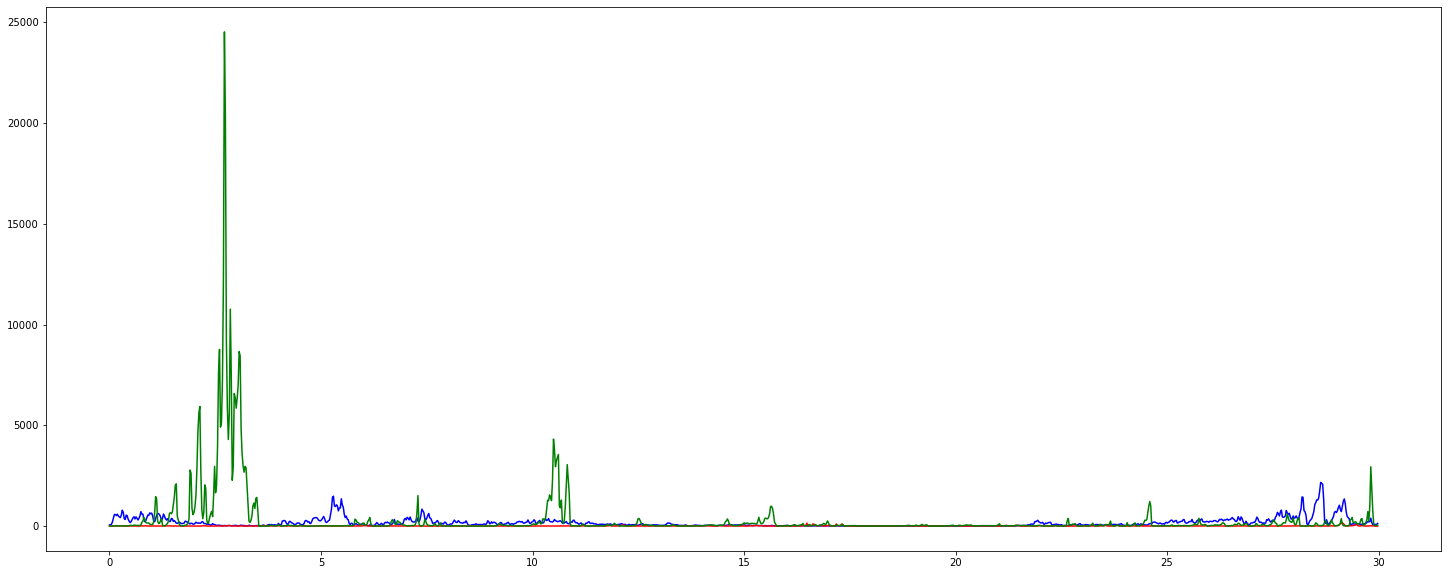

In [22]:
frames = range(len(debussy_ber))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(25,10))
plt.plot(t, debussy_ber, color='b')
plt.plot(t, redhot_ber, color='r')
plt.plot(t, duke_ber, color='g')
plt.show()